## Setup ##

In [10]:
#!/usr/bin/python

# The libraries
# Data analysis and manipulation
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from joblib import dump

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score

# Reading the csv file
df = pd.read_csv("dataset.csv")
# Getting rid of string tokens
df.drop(['URL'], 1, inplace = True)
# Separating the labels
y = df['malicious']
x = df.drop(['malicious'], 1)

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split( x, y, train_size = .8, random_state = 40)


## Logistic Regression Model ##

---

## Tuning ##

Methods 
- Label encoding (editing data on input)
- Hotshot encoding (")
- C manipulation (See Below)
- Data learning split (altering learining/training ratio)
- Solver Type (Newton-cg & liblinear give results with convergence within reasonable iterations)

This may need to be edited or removed?

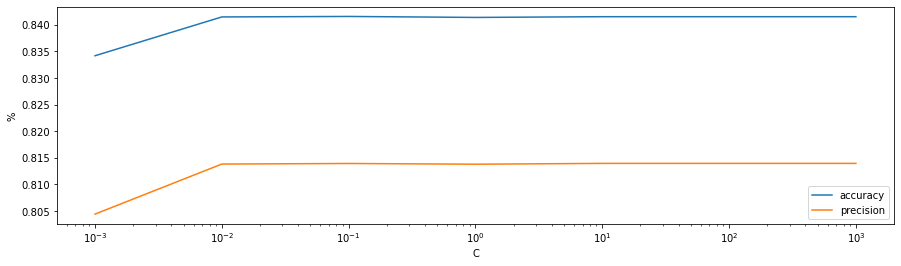

In [30]:
#logarithmic show if C values to see affect
C_param_range = [0.001,0.01,0.1,1,10,100,1000]
iterations = range(len(C_param_range))

ac, fscore = [], []

#Iterate through values of C to compare Fscore and Accuracy
for i in iterations:
    LG = LogisticRegression(solver='newton-cg', C=C_param_range[i])
    # Train the model
    LG.fit(x_train, y_train)
    LG_predict = LG.predict(x_test)
    
    ac.append(accuracy_score(y_test,LG_predict))
    fscore.append(f1_score(y_test, LG_predict))
    
#Plotting C values logarithmically    
plt.subplots(1,1,figsize = (15,4))
plt.plot(C_param_range, ac, label = 'accuracy')
plt.plot(C_param_range, fscore, label = 'precision')
plt.xscale("log")
plt.xlabel('C')
plt.ylabel('%')
plt.legend()

In [2]:
#First model using newton-cg solver method
LG = LogisticRegression(solver='newton-cg', C=1000)
# Train the model
LG.fit(x_train, y_train)
LG_predict = LG.predict(x_test)
ac = accuracy_score(y_test,LG_predict)

#Second model using liblinear solver method
LG_lib = LogisticRegression(solver='liblinear', C=1000)
# Train the model
LG_lib.fit(x_train, y_train)
LG_lib_predict = LG_lib.predict(x_test)
ac_lib = accuracy_score(y_test,LG_lib_predict)

## Feature Importance ##

<AxesSubplot:>

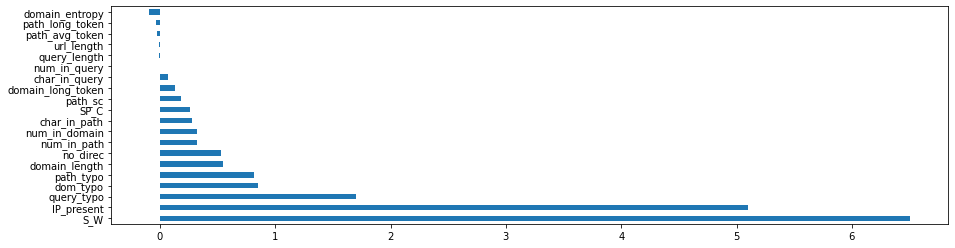

In [3]:
"""
    Here we find each feature's contrubution to the categorization.
"""

# Getting the keys of the features
features = [f for f in x.keys()]

#plot of features affecting newton model
rfc_imp = pd.Series(LG.coef_[0], index=features).sort_values(ascending=False).nlargest(20)
rfc_imp.plot(kind='barh',figsize=(15,4))

<AxesSubplot:>

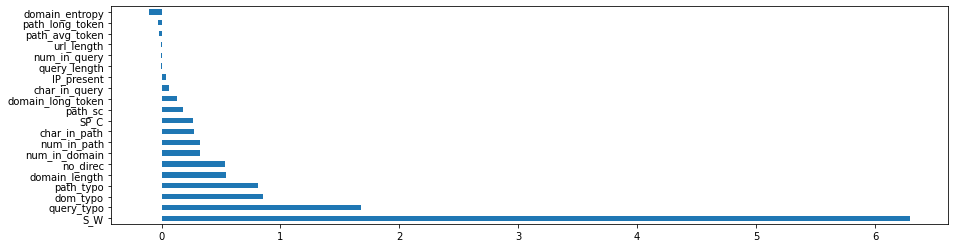

In [4]:
# Getting the keys of the features
features = [f for f in x.keys()]

#plot of features affecting liblinear model
rfc_imp = pd.Series(LG_lib.coef_[0], index=features).sort_values(ascending=False).nlargest(20)
rfc_imp.plot(kind='barh',figsize=(15,4))

## Model Performance ##
### Seen Data (newton) ###

TN 10610
FP 1037
FN 2414
TP 7479
FPR 0.08903580321112733
FNR 0.24401091680986556
Accuracy 0.839786443825441
              precision    recall  f1-score   support

           0       0.81      0.91      0.86     11647
           1       0.88      0.76      0.81      9893

    accuracy                           0.84     21540
   macro avg       0.85      0.83      0.84     21540
weighted avg       0.84      0.84      0.84     21540



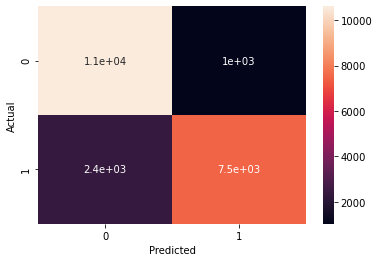

In [5]:
"""
    The model's performance is evaluated according to the following critera:
    1 - accuarcy
    2 - precision
    3 - recall
    4 - f_score
    5 - False Negative Rate
    6 - False Positive Rate
"""

CM = confusion_matrix (y_test, LG_predict)
ac = accuracy_score(y_test,LG_predict)

print ('TN',CM[0][0])
print ('FP',CM[0][1])
print ('FN',CM[1][0])
print ('TP',CM[1][1])
print('FPR', CM[0][1]/(CM[0][1]+CM[0][0]))
print('FNR', CM[1][0]/(CM[1][0]+CM[1][1]))
print('Accuracy',ac)
# Getting the other measures
report = classification_report(y_test,LG_predict)

print(report)
sn.heatmap(CM, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### (Liblinear) ###

TN 10610
FP 1037
FN 2416
TP 7477
FPR 0.08903580321112733
FNR 0.2442130799555241
Accuracy 0.8396935933147632
              precision    recall  f1-score   support

           0       0.81      0.91      0.86     11647
           1       0.88      0.76      0.81      9893

    accuracy                           0.84     21540
   macro avg       0.85      0.83      0.84     21540
weighted avg       0.84      0.84      0.84     21540



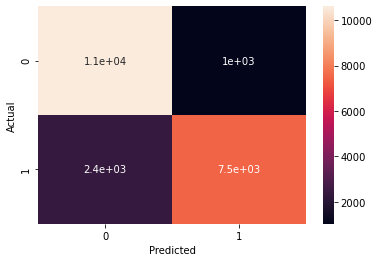

In [6]:
CM_lib = confusion_matrix (y_test, LG_lib_predict)
ac_lib = accuracy_score(y_test,LG_lib_predict)

print ('TN',CM_lib[0][0])
print ('FP',CM_lib[0][1])
print ('FN',CM_lib[1][0])
print ('TP',CM_lib[1][1])
print('FPR', CM_lib[0][1]/(CM_lib[0][1]+CM_lib[0][0]))
print('FNR', CM_lib[1][0]/(CM_lib[1][0]+CM_lib[1][1]))
print('Accuracy',ac_lib)
# Getting the other measures
report = classification_report(y_test,LG_lib_predict)

print(report)
sn.heatmap(CM, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Unseen Data ##

### Newton ###

TN 9428
FP 573
FN 323
TP 1482
FPR 0.05729427057294271
FNR 0.17894736842105263
Accuracy 0.9241063865830933
              precision    recall  f1-score   support

           0       0.97      0.94      0.95     10001
           1       0.72      0.82      0.77      1805

    accuracy                           0.92     11806
   macro avg       0.84      0.88      0.86     11806
weighted avg       0.93      0.92      0.93     11806



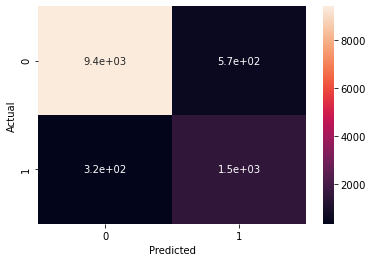

['logisticRegression.joblib']

In [12]:
data = pd.read_csv('unseen.csv')
data.drop(['URL'], 1, inplace = True)
y_test = data['malicious']
x_test = data.drop(['malicious'],1)
LG_predict = LG.predict(x_test)


CM = confusion_matrix (y_test, LG_predict)
ac = accuracy_score(y_test,LG_predict)

print ('TN',CM[0][0])
print ('FP',CM[0][1])
print ('FN',CM[1][0])
print ('TP',CM[1][1])
print('FPR', CM[0][1]/(CM[0][1]+CM[0][0]))
print('FNR', CM[1][0]/(CM[1][0]+CM[1][1]))
print('Accuracy',ac)
# Getting the other measures
report = classification_report(y_test,LG_predict)

print(report)
sn.heatmap(CM, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Store the model for future use
#dump('../TrainedModels/logisticRegression.joblib')

### Liblinear ###

TN 9428
FP 573
FN 323
TP 1482
FPR 0.05729427057294271
FNR 0.17894736842105263
Accuracy 0.9241063865830933
              precision    recall  f1-score   support

           0       0.97      0.94      0.95     10001
           1       0.72      0.82      0.77      1805

    accuracy                           0.92     11806
   macro avg       0.84      0.88      0.86     11806
weighted avg       0.93      0.92      0.93     11806



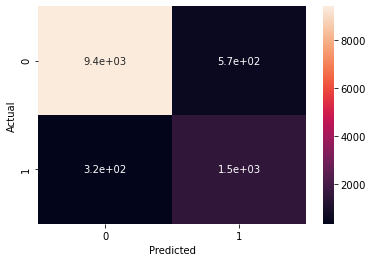

In [13]:
LG_lib_predict = LG_lib.predict(x_test)


CM = confusion_matrix (y_test, LG_lib_predict)
ac = accuracy_score(y_test,LG_lib_predict)

print ('TN',CM[0][0])
print ('FP',CM[0][1])
print ('FN',CM[1][0])
print ('TP',CM[1][1])
print('FPR', CM[0][1]/(CM[0][1]+CM[0][0]))
print('FNR', CM[1][0]/(CM[1][0]+CM[1][1]))
print('Accuracy',ac)
# Getting the other measures
report = classification_report(y_test,LG_lib_predict)

print(report)
sn.heatmap(CM, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()